# Random data generation for a call center dashboard
# (Python and Power BI)
---

#### The aim of this project is to randomly generate fictitious data for a call center in Canada using Python then create a dashboard in Power BI.

The following columns will be randomly generated in a csv file:

| Column      | Description|
|:-------------|:------------|
|idKey           |A unique alphanumeric identifier for each call (length: 22 char. Format used: 5904042-C6NFQX-7148197)|
|callDate           |The date of the call (no time)|
|callCenter           |The name of the center that the customer called (Toronto, Montreal, Calgary or Edmonton)|
|channel           |The method or communication channel a customer used to interact with a call center ('Call-Center', 'Chatbot', 'Email', 'Web')|
|city           |The city from where the customer called|
|firstLastName           |The customer first and last names|
|reason           |The main reason why the customer called ('Billing Question', 'Service Outage', 'Payments')|
|responseTime           |Evaluation on a scale of the time taken by a call center agent to answer an incoming customer call or respond to a customer’s inquiry (it can have one the three values: 'Below SLA', 'Within SLA', 'Above SLA')|
|sentiment           |Customers feedback after the call ('Neutral', 'Very Positive', 'Negative', 'Very Negative', 'Positive')|
|province           |Province from which the customer called|
|callDuration           |Duration of the call (in minutes|
|weekDay           |The day of the week of the callDate column|

#### The csv file will then be imported in Power BI Desktop to create a dashboard.

#### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import random
from random import randrange
import string
from numpy.random import default_rng

#### Create the list of call centers

In [2]:
call_centers = ['Toronto', 'Montreal', 'Calgary', 'Edmonton']

#### Create the list of call channels

In [3]:
channels = ['Call-Center', 'Chatbot', 'Email', 'Web']

#### Create the list of cities
The list of cities and provinces in csv format was downloaded from https://simplemaps.com/data/canada-cities

In [4]:
cities_dict = pd.read_csv('canadacities.csv')

#Convert the cities_dict dataframe to a dictionary with two columns
cities = cities_dict.set_index('city_ascii')['province_name'].to_dict()

#### Create the list of reasons

In [5]:
reasons = ['Billing Question', 'Service Outage', 'Payments']

#### Create the list of response times

In [6]:
responseTimes = ['Above SLA', 'Below SLA', 'Within SLA']

#### Create the list of sentiments

In [7]:
sentiments = ['Neutral', 'Very Positive', 'Negative', 'Very Negative', 'Positive']

#### Function randomDate returns a random date between two dates given as parameters

In [8]:
def randomDate(start, end):    
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

#### Function randomCity returns a random city from the cities list

In [9]:
def randomCity():
    #Get a random key-value pair from the cities dictionary
    rndCity, rndCapital = random.choice(list(cities.items()))

    return rndCity, rndCapital


#### Function genRandKey generates a random key of 22 char. long using the 999999999-AAAAAA-9999999 format

In [10]:
def genRandKey():
    part1 = str(random.randrange(1, 10000000)).rjust(5, '0')
    part2 = ''.join(random.choices(string.ascii_letters + string.digits, k=6)).upper()
    part3 = str(random.randrange(1, 10000000)).rjust(7, '0')
   
    return(part1 + "-" + part2 + "-" + part3)

#### Create a dataframe of first names and last names from two text files.
#### The files in txt format were downloaded from https://gist.github.com/elifiner/cc90fdd387449158829515782936a9a4

In [11]:
# Opening the first names file in read mode 
myFile = open("first-names.txt", "r") 
  
# Reading the file 
data = myFile.read() 
  
# Replacing end splitting the text when newline ('\n') is found
firstNames = data.split("\n") 
myFile.close() 

# Opening the first names file in read mode 
myFile = open("last-names.txt", "r") 
  
# Reading the file 
data = myFile.read() 
  
# Replacing end splitting the text when newline ('\n') is found
lastNames = data.split("\n") 
myFile.close() 

#### Main lines of the script
In this section, we will create a dataframe of 300,000 rows. Each row having 11 columns randomly generated

In [12]:
# Create a list of all columns to be used in the dataframe
cols = ['idKey', 'callDate', 'callCenter', 'channel', 'city', 'firstLastName', 'reason', 'responseTime', 'sentiment', 'province', 'callDuration']

# Create an empty list in which each column will be added during the loop
lst = []

# Generate 1,000,000 rows
for i in range(0, 1000000):
    
    # Generate a random random key of 22 char. long using the 999999999-AAAAAA-9999999 format
    idKey = genRandKey() 

    # Generate a random date between 2018 and 2023
    # We use [:10] to take only the date part of the date generated and leave the time part
    callDate = str(randomDate(datetime.datetime(2018, 1, 1),datetime.datetime(2024, 1, 1)))[:10]
    
    # Generate a random call center from the call centers list
    call_center = random.choice(call_centers)
    
     # Generate a random channel from the channels list
    channel = random.choice(channels)
    
    # Generate a random city and its province from the cities dictionnary
    city, province = randomCity()
        
     # Generate a random reason from the reasons list
    reason = random.choice(reasons)
    
    # Generate a random response time from the response time list
    responseTime = random.choice(responseTimes)
    
    # Generate a random sentiment from the sentiments list
    sentiment = random.choice(sentiments)
    
    # Generate a random number between 3 and 50 for the call duration in minutes
    callDuration = str(random.randrange(3, 50))
    
    # Generate a random first and a random last name from the lists of first and last names
    firstLastName = random.choice(firstNames).capitalize() + " " + random.choice(lastNames).capitalize()
           
    # Append all the variables generated in a list
    lst.append([idKey, callDate, call_center, channel, city, firstLastName, reason, responseTime, sentiment, province, callDuration])
    
# Create a dataframe with the list of 300,000 rows created above   
df = pd.DataFrame(lst, columns=cols)

#Convert the 'callDate' column to datetime
df['callDate'] = df['callDate'].astype('datetime64[ns]')

#Convert the 'callDuration' column to int
df['callDuration'] = df['callDuration'].astype('int')

# Print information about the newly created dataFrame 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   idKey          1000000 non-null  object        
 1   callDate       1000000 non-null  datetime64[ns]
 2   callCenter     1000000 non-null  object        
 3   channel        1000000 non-null  object        
 4   city           1000000 non-null  object        
 5   firstLastName  1000000 non-null  object        
 6   reason         1000000 non-null  object        
 7   responseTime   1000000 non-null  object        
 8   sentiment      1000000 non-null  object        
 9   province       1000000 non-null  object        
 10  callDuration   1000000 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(9)
memory usage: 80.1+ MB
None


#### Create a week day column from the callDate column

In [13]:
df['weekDay'] = df['callDate'].dt.weekday.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

#### In the section below, we randomly delete a percentage of rows from the dataframe because its has been observed that, after generating the 300,000 rows, the distribution is close to uniform

In [14]:
weekDays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Repeat 7 times
for i in range(6):
    randItem = random.choice(sentiments)
    
    #Delete between 20% and 60% of of rows containing a sentiment picked randomly
    indexes = df[df.sentiment == randItem].sample(frac=random.uniform(0.2, 0.2)).index
    df = df.drop(indexes)

    #Delete between 20% and 60% of of rows containing a call center picked randomly
    randItem = random.choice(call_centers)
    indexes = df[df.callCenter == randItem].sample(frac=random.uniform(0.2, 0.2)).index
    df = df.drop(indexes)
  
    #Delete between 20% and 60% of of rows containing a reason picked randomly
    randItem = random.choice(reasons)
    indexes = df[df.reason == randItem].sample(frac=random.uniform(0.2, 0.2)).index
    df = df.drop(indexes)
  
    #Delete between 20% and 60% of of rows containing a channel picked randomly
    randItem = random.choice(channels)
    indexes = df[df.channel == randItem].sample(frac=random.uniform(0.2, 0.2)).index
    df = df.drop(indexes)
    
    #Delete between 20% and 60% of of rows containing a response time picked randomly
    randItem = random.choice(responseTimes)
    indexes = df[df.responseTime == randItem].sample(frac=random.uniform(0.2, 0.2)).index
    df = df.drop(indexes)

    #Delete between 20% and 60% of of rows containing a week day picked randomly
    randItem = random.choice(weekDays)
    indexes = df[df.weekDay == randItem].sample(frac=random.uniform(0.2, 0.2)).index
    df = df.drop(indexes)
    
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
Index: 158511 entries, 2 to 999988
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   idKey          158511 non-null  object        
 1   callDate       158511 non-null  datetime64[ns]
 2   callCenter     158511 non-null  object        
 3   channel        158511 non-null  object        
 4   city           158511 non-null  object        
 5   firstLastName  158511 non-null  object        
 6   reason         158511 non-null  object        
 7   responseTime   158511 non-null  object        
 8   sentiment      158511 non-null  object        
 9   province       158511 non-null  object        
 10  callDuration   158511 non-null  int32         
 11  weekDay        158511 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(10)
memory usage: 15.1+ MB
None


#### Visualizations. Bar charts for total number of calls by :
* Call center
* Reason
* Province
* Channel
* response time
* Sentiment
* Week day

Text(0, 0.5, 'Total calls')

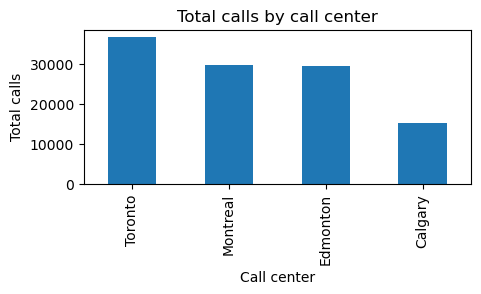

In [26]:
# Total number of calls by call center
plt.rcParams["figure.figsize"] = (5, 2)
ax = df['callCenter'].value_counts().plot(kind='bar', title="Total calls by call center")
ax.set_xlabel("Call center")
ax.set_ylabel("Total calls")

Text(0, 0.5, 'Total calls')

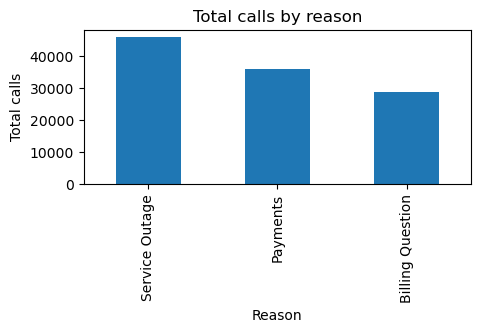

In [27]:
# Total number of calls by reason
plt.rcParams["figure.figsize"] = (5, 2)
ax = df['reason'].value_counts().plot(kind='bar', title="Total calls by reason")
ax.set_xlabel("Reason")
ax.set_ylabel("Total calls")

Text(0, 0.5, 'Total calls')

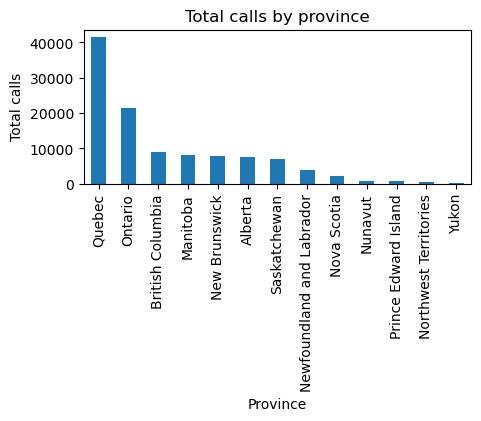

In [28]:
# Total number of calls by province
plt.rcParams["figure.figsize"] = (5, 2)
ax = df['province'].value_counts().plot(kind='bar', title="Total calls by province")
ax.set_xlabel("Province")
ax.set_ylabel("Total calls")

Text(0, 0.5, 'Total calls')

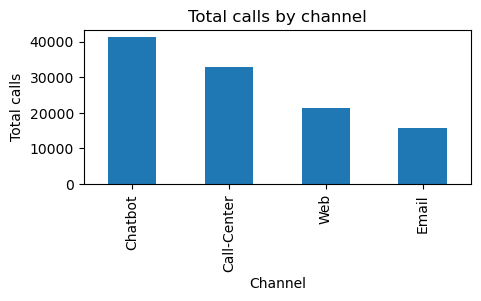

In [29]:
# Total number of calls by channel
plt.rcParams["figure.figsize"] = (5, 2)
ax = df['channel'].value_counts().plot(kind='bar', title="Total calls by channel")
ax.set_xlabel("Channel")
ax.set_ylabel("Total calls")

Text(0, 0.5, 'Total calls')

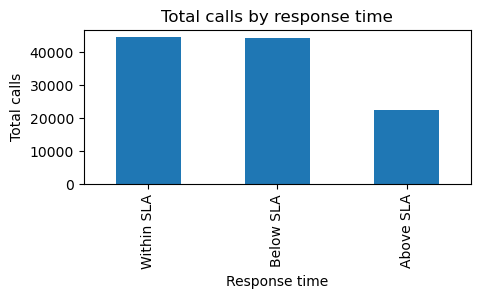

In [30]:
# Total number of calls by response time
plt.rcParams["figure.figsize"] = (5, 2)
ax = df['responseTime'].value_counts().plot(kind='bar', title="Total calls by response time")
ax.set_xlabel("Response time")
ax.set_ylabel("Total calls")

Text(0, 0.5, 'Total calls')

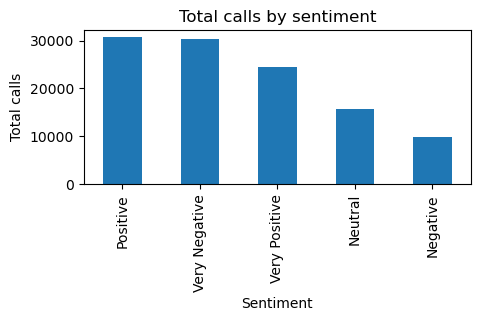

In [31]:
# Total number of calls by sentiment
plt.rcParams["figure.figsize"] = (5, 2)
ax = df['sentiment'].value_counts().plot(kind='bar', title="Total calls by sentiment")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Total calls")

Text(0, 0.5, 'Total calls')

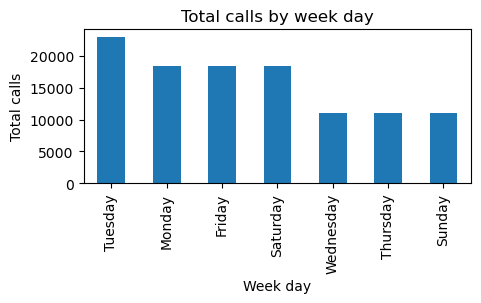

In [32]:
# Total number of calls by week day
plt.rcParams["figure.figsize"] = (5, 2)
ax = df['weekDay'].value_counts().plot(kind='bar', title="Total calls by week day")
ax.set_xlabel("Week day")
ax.set_ylabel("Total calls")

In [22]:
countRows = df.shape[0]

df2 = df.groupby(['callCenter'])['idKey'].count().sort_values(ascending=False).reset_index(name="count")
df2['%'] = (df2['count'] / countRows)*100
print(df2, '\n')

df2 = df.groupby(['channel'])['idKey'].count().sort_values(ascending=False).reset_index(name="count")
df2['%'] = (df2['count'] / countRows)*100
print(df2, '\n')

df2 = df.groupby(['reason'])['idKey'].count().sort_values(ascending=False).reset_index(name="count")
df2['%'] = (df2['count'] / countRows)*100
print(df2, '\n')

df2 = df.groupby(['responseTime'])['idKey'].count().sort_values(ascending=False).reset_index(name="count")
df2['%'] = (df2['count'] / countRows)*100
print(df2, '\n')

df2 = df.groupby(['province'])['idKey'].count().sort_values(ascending=False).reset_index(name="count")
df2['%'] = (df2['count'] / countRows)*100
print(df2, '\n')

df2 = df.groupby(['sentiment'])['idKey'].count().sort_values(ascending=False).reset_index(name="count")
df2['%'] = (df2['count'] / countRows)*100
print(df2, '\n')

df2 = df.groupby(['weekDay'])['idKey'].count().sort_values(ascending=False).reset_index(name="count")
df2['%'] = (df2['count'] / countRows)*100
print(df2, '\n')


  callCenter  count          %
0    Toronto  52651  33.215991
1   Montreal  42407  26.753348
2   Edmonton  41967  26.475765
3    Calgary  21486  13.554895 

       channel  count          %
0      Chatbot  53674  33.861372
1  Call-Center  42997  27.125562
2        Email  34101  21.513333
3          Web  27739  17.499732 

             reason  count          %
0    Service Outage  65548  41.352335
1          Payments  51703  32.617926
2  Billing Question  41260  26.029739 

  responseTime  count          %
0   Within SLA  63342  39.960634
1    Below SLA  63228  39.888714
2    Above SLA  31941  20.150652 

                     province  count          %
0                      Quebec  59115  37.293942
1                     Ontario  30826  19.447231
2            British Columbia  12948   8.168518
3                    Manitoba  11502   7.256279
4               New Brunswick  11245   7.094145
5                     Alberta  10967   6.918763
6                Saskatchewan  10140   6.397032
7   

#### Manually drop some rows to have bars charts of different sizes

In [23]:
indexes = df[df.weekDay == 'Wednesday'].sample(frac=0.4).index
df = df.drop(indexes)

indexes = df[df.weekDay == 'Thursday'].sample(frac=0.4).index
df = df.drop(indexes)

indexes = df[df.weekDay == 'Sunday'].sample(frac=0.4).index
df = df.drop(indexes)

indexes = df[df.channel == 'Email'].sample(frac=0.4).index
df = df.drop(indexes)

indexes = df[df.sentiment == 'Negative'].sample(frac=0.5).index
df = df.drop(indexes)

#### Create a csv file sorted by callDate

In [24]:
df = df.sort_values(by='callDate')
df.to_csv('call_center_Canada.csv', index=False)

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 111054 entries, 171780 to 73997
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   idKey          111054 non-null  object        
 1   callDate       111054 non-null  datetime64[ns]
 2   callCenter     111054 non-null  object        
 3   channel        111054 non-null  object        
 4   city           111054 non-null  object        
 5   firstLastName  111054 non-null  object        
 6   reason         111054 non-null  object        
 7   responseTime   111054 non-null  object        
 8   sentiment      111054 non-null  object        
 9   province       111054 non-null  object        
 10  callDuration   111054 non-null  int32         
 11  weekDay        111054 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(10)
memory usage: 10.6+ MB
None
